In [1]:
from konlpy.tag import Komoran

In [70]:
#데이터 불러오기.  한줄에 댓글 하나 → 리스트로 댓글별 저장
INPUT_FILE = '데이터공방.txt'

datas=[]
with open(INPUT_FILE, "r", encoding = 'utf-8') as input_file:
    for line in input_file:
        datas.append(line.strip().replace('\ufeff','').split(' '))
#     data=input_file.read()

# print(datas)        

In [71]:
words = [word for words in datas for word in words ]

In [72]:
###잠깐 딴 짓. 워드클라우드 만들기

from collections import Counter

# 빈도 높은 단어들만 가져오기
words_count=Counter()
words_count.update(words)

print(words_count)    
    
word_most = words_count.most_common(50)

Counter({'데이터공방': 113, '크롤링': 21, '교육': 18, '강의': 17, '인스타': 17, '인스타그램': 16, '댓글': 10, '네이버까페': 9, '팔로우': 9, '텍스트마이닝': 8, '태그': 8, '트랜드': 8, '분석': 8, 'SNS': 7, '네이버블로그': 7, '네이버뉴스': 7, '다음뉴스': 7, '좋아요': 7, '블로그': 7, '필수': 7, '태그분석': 6, '트위터': 6, '네이버': 6, '순위': 6, '파이썬': 6, '트렌드분석': 4, '트랜드분석': 4, '영업': 4, '쉽게': 4, '빠르게': 4, '빅데이터': 3, '기획자': 3, '고객분석': 3, '마케팅': 3, '프로그램': 3, '쉽다': 3, '신제품개발': 2, '기획': 2, '빅데이터분석': 2, '소셜': 2, '사진': 2, '파워블로그': 2, '마케터': 1, '리트윗': 1, '초급': 1, '기초': 1, '인사이트': 1, '까페': 1, '고객전략': 1, '판매전략': 1, '서비스': 1, '스타트업': 1, '인기': 1, '크롤링교육': 1, '누구나': 1})


In [27]:
word_most

[('데이터공방', 81),
 ('인스타', 14),
 ('인스타그램', 12),
 ('텍스트마이닝', 8),
 ('트랜드', 8),
 ('네이버까페', 8),
 ('팔로우', 8),
 ('댓글', 8),
 ('네이버뉴스', 7),
 ('다음뉴스', 7),
 ('SNS', 6),
 ('태그', 6),
 ('태그분석', 6),
 ('크롤링', 6),
 ('네이버블로그', 6),
 ('트위터', 6),
 ('분석', 6),
 ('좋아요', 6),
 ('네이버', 6),
 ('블로그', 6),
 ('순위', 6),
 ('트렌드분석', 4),
 ('신제품개발', 2),
 ('기획', 2),
 ('빅데이터분석', 2),
 ('소셜', 2),
 ('사진', 2),
 ('프로그램', 2),
 ('빅데이터', 2)]

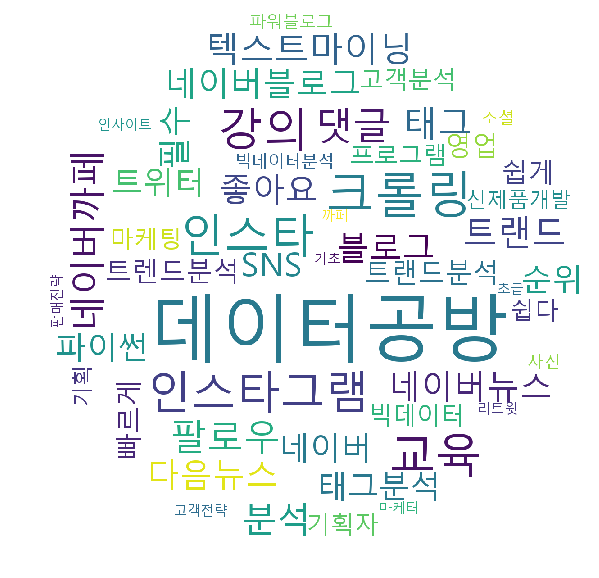

In [112]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image

mask_img = 'yellow.jpg'
mask = np.array(Image.open(mask_img))

tmp = dict(words_count)
wordcloud=WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", relative_scaling=0.4, 
                    background_color="white", max_words=50, mask=mask,
                   font_step=10).generate_from_frequencies(tmp)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('데이터공방워드클라우드7.png')

In [18]:
# 벡터행렬 생성하기

from collections import Counter

['요금', '갱', '국민', '호', '폰', '없다', '비싸다', '자급', '단말기', '안', '최씨', '통신사', '전', '때', '말', '같다', '증거', '휴대폰', '사람', '유심', '김현중', '가격', '여자', '사기', '배', '값', '좋다', '완전', '기사', '소비자', '통신비', '시장', '인하', '보조금', '나라', '약정', '생각', '임신', '통신', '조사', '정부', '이렇다', '법', '폭리', '지금', '가능하다', '사용', '유통', '판결', '얼마', '경쟁', '형사재판', '불법', '정보', '돈', '북한', '데이터', '테러', '시간', '우리나라', '재판부', '거지', '폭행', '재판', '경찰', '한국', '인수', '개발', '냐', '민사', '사건', '입장', '기소', '미국', '소리', '검찰', '장사', '밥통', '기자', '출고', '상대', '아이', '게', '방지법', '할인', '문제', '통사', '인터넷', '대기업', '의미', '외국', '분리', '방법', '관여', '뭐', '디스패치', '검증', '그동안', '이유', '정상', '유심칩', '차폐', '철폐', '위약', '스마트폰', '서비스', '구속', '고가', '이제', '변호사', '그렇다', '조작', '확장', '단속', '유산', '손', '상태', '진행', '명예훼손', '기업', '애', '뒤', '팔', '억울하다', '전쟁', '방통위', '대책', '방지', '궁금하다', '비', '전화', '개', '도입', '공격', '정책', '소송', '군', '문자', '적', '사실', '쉽다', '내용', '다음', '걱정', '영업', '폐', '표준', '사', '범죄', '요구', '경제', '이익', '회선', '지원금', '수사관', '족쇄', '기관', '법원', '불합리', '체계', '논리', '아', '계획', '알뜰하다',

In [85]:
# 단어 관계 행렬 만들기

from itertools import combinations

word_cooc_mat=Counter()

for word1, word2 in combinations(set(words_count),2):
    word_cooc_mat[(word1,word2)]+=1
    

    

In [40]:
print(word_cooc_mat)

Counter({('크롤링', '트랜드'): 1, ('크롤링', '댓글'): 1, ('크롤링', '분석'): 1, ('크롤링', '신제품개발'): 1, ('크롤링', '블로그'): 1, ('크롤링', '네이버까페'): 1, ('크롤링', '텍스트마이닝'): 1, ('크롤링', '사진'): 1, ('크롤링', '빅데이터분석'): 1, ('크롤링', '네이버'): 1, ('크롤링', '네이버뉴스'): 1, ('크롤링', '트렌드분석'): 1, ('크롤링', '데이터공방'): 1, ('크롤링', '순위'): 1, ('크롤링', '기획'): 1, ('크롤링', '태그'): 1, ('크롤링', '트위터'): 1, ('크롤링', '빅데이터'): 1, ('크롤링', '네이버블로그'): 1, ('크롤링', '팔로우'): 1, ('크롤링', '태그분석'): 1, ('크롤링', '인스타'): 1, ('크롤링', '프로그램'): 1, ('크롤링', '다음뉴스'): 1, ('크롤링', '소셜'): 1, ('크롤링', '좋아요'): 1, ('크롤링', 'SNS'): 1, ('크롤링', '인스타그램'): 1, ('트랜드', '댓글'): 1, ('트랜드', '분석'): 1, ('트랜드', '신제품개발'): 1, ('트랜드', '블로그'): 1, ('트랜드', '네이버까페'): 1, ('트랜드', '텍스트마이닝'): 1, ('트랜드', '사진'): 1, ('트랜드', '빅데이터분석'): 1, ('트랜드', '네이버'): 1, ('트랜드', '네이버뉴스'): 1, ('트랜드', '트렌드분석'): 1, ('트랜드', '데이터공방'): 1, ('트랜드', '순위'): 1, ('트랜드', '기획'): 1, ('트랜드', '태그'): 1, ('트랜드', '트위터'): 1, ('트랜드', '빅데이터'): 1, ('트랜드', '네이버블로그'): 1, ('트랜드', '팔로우'): 1, ('트랜드', '태그분석'): 1, ('트랜드', '인스타'): 1, ('트랜드', '프로그램'): 1, ('트랜드',

In [86]:
# 단어 관계 행렬 쓰기 
from collections import Counter
from itertools import combinations

word_cooc_mat=Counter()

for line in datas:
    for word1, word2 in combinations(line,2):
        word_cooc_mat[(word1,word2)]+=1


    

In [87]:
# 단어관계 행렬  counter 형태 --> 리스트 내 튜플 형태로 수정 --> 정렬하기

word_coocs=[]
for words, count in word_cooc_mat.items():
    word_coocs.append((words[0],words[1],count))
# print(word_coocs)    
        
sorted_word_coocs = sorted(word_coocs, key=lambda x: x[2], reverse=True)   # 정렬하기
print(sorted_word_coocs)

[('데이터공방', '데이터공방', 34), ('교육', '데이터공방', 33), ('교육', '필수', 28), ('교육', '강의', 26), ('강의', '데이터공방', 25), ('크롤링', '교육', 25), ('강의', '교육', 24), ('교육', '교육', 24), ('크롤링', '강의', 23), ('데이터공방', '크롤링', 22), ('파이썬', '교육', 22), ('크롤링', '데이터공방', 20), ('데이터공방', '인스타', 19), ('데이터공방', '교육', 18), ('데이터공방', '강의', 17), ('강의', '필수', 17), ('데이터공방', '인스타그램', 16), ('교육', '쉽게', 16), ('교육', '빠르게', 16), ('크롤링', '필수', 14), ('필수', '데이터공방', 14), ('강의', '강의', 12), ('파이썬', '강의', 12), ('파이썬', '데이터공방', 12), ('교육', '크롤링', 12), ('교육', '쉽다', 12), ('데이터공방', '댓글', 10), ('파이썬', '필수', 10), ('데이터공방', '네이버까페', 9), ('데이터공방', '팔로우', 9), ('강의', '쉽다', 9), ('데이터공방', '텍스트마이닝', 8), ('데이터공방', '태그', 8), ('데이터공방', '트랜드', 8), ('인스타', '인스타그램', 8), ('데이터공방', '분석', 8), ('인스타', '댓글', 8), ('크롤링', '쉽게', 8), ('크롤링', '빠르게', 8), ('강의', '쉽게', 8), ('강의', '빠르게', 8), ('쉽게', '데이터공방', 8), ('빠르게', '데이터공방', 8), ('교육', '마케팅', 8), ('교육', '영업', 8), ('교육', '기획자', 8), ('데이터공방', 'SNS', 7), ('인스타그램', '태그', 7), ('크롤링', '기획자', 7), ('강의', '기획자', 7), ('데이터공방', '네

In [44]:
#그래프 그리기
import networkx as nx
import matplotlib.pyplot as plt

In [124]:
#탐색용. 삭제가능

sorted_word_coocs[:40]

[('호', '갱', 47),
 ('단말기', '요금', 22),
 ('단말기', '소비자', 21),
 ('최씨', '최씨', 20),
 ('요금', '요금', 19),
 ('자급', '폰', 18),
 ('단말기', '단말기', 18),
 ('약정', '단말기', 18),
 ('단말기', '가격', 18),
 ('요금', '단말기', 17),
 ('단말기', '자급', 16),
 ('단말기', '시장', 16),
 ('갱', '갱', 15),
 ('단말기', '유통', 15),
 ('갱', '사람', 14),
 ('호', '호', 14),
 ('국민', '갱', 14),
 ('갱', '호', 14),
 ('국민', '호', 14),
 ('단말기', '정상', 13),
 ('증거', '최씨', 13),
 ('호', '비싸다', 13),
 ('차폐', '도입', 13),
 ('약정', '요금', 13),
 ('갱', '비싸다', 13),
 ('호', '사람', 13),
 ('유통', '요금', 13),
 ('약정', '유통', 12),
 ('단말기', '의미', 12),
 ('단말기', '실현', 12),
 ('단말기', '이상', 12),
 ('시장', '요금', 12),
 ('요금', '소비자', 12),
 ('폰', '폰', 12),
 ('약정', '시장', 12),
 ('단말기', '입장', 12),
 ('약정', '소비자', 12),
 ('시장', '소비자', 12),
 ('유통', '소비자', 12),
 ('단말기', '완전', 12)]

In [90]:
G= nx.Graph()

for word1, word2, count in sorted_word_coocs[:30]:    #상위 n개로만 그림 그리기
    G.add_edge(word1, word2, weight=count)
    
T = nx.minimum_spanning_tree(G)

  

In [119]:
T.nodes()

['자급',
 '유통',
 '사람',
 '요금',
 '단말기',
 '이상',
 '갱',
 '차폐',
 '증거',
 '도입',
 '국민',
 '폰',
 '시장',
 '가격',
 '입장',
 '실현',
 '최씨',
 '의미',
 '완전',
 '약정',
 '호',
 '소비자',
 '비싸다',
 '정상']

In [ ]:
T.

In [120]:
T.edges()

[('자급', '단말기'),
 ('자급', '폰'),
 ('유통', '단말기'),
 ('유통', '소비자'),
 ('유통', '약정'),
 ('사람', '호'),
 ('요금', '시장'),
 ('요금', '소비자'),
 ('단말기', '이상'),
 ('단말기', '입장'),
 ('단말기', '실현'),
 ('단말기', '의미'),
 ('단말기', '가격'),
 ('단말기', '완전'),
 ('단말기', '정상'),
 ('갱', '비싸다'),
 ('갱', '국민'),
 ('차폐', '도입'),
 ('증거', '최씨'),
 ('호', '비싸다')]

C:\Users\namso_000\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\namso_000\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\namso_000\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\namso_000\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, wi

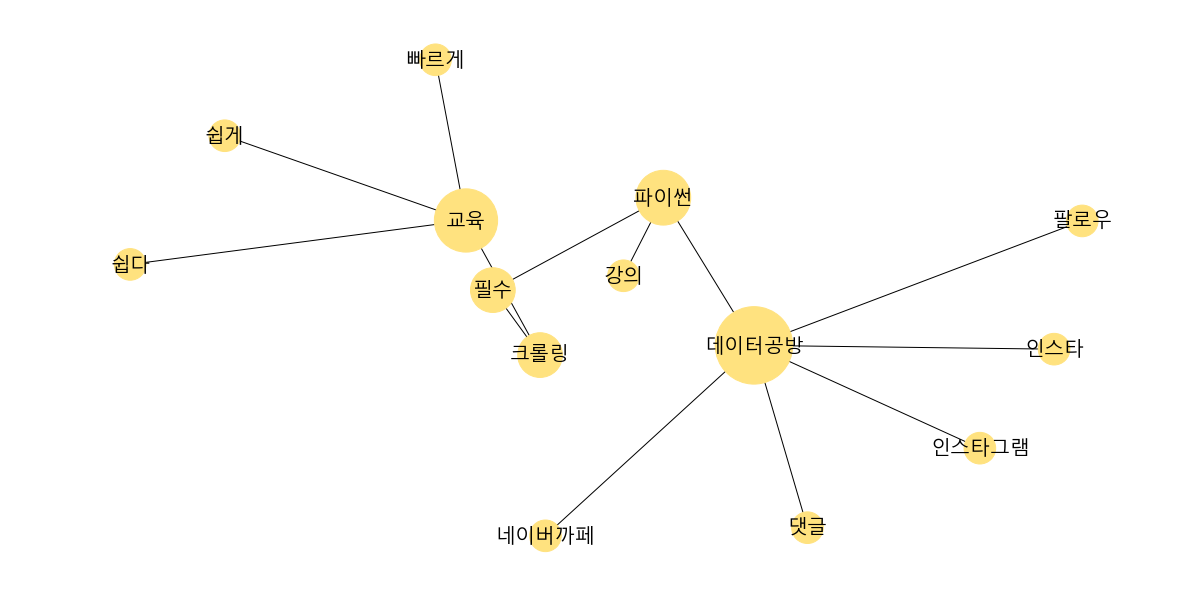

In [91]:
# 그래프 그리기

import sys

nodes = nx.nodes(T)
degrees = nx.degree(T)

node_size = []

for node in nodes:
    ns = degrees[node]*1000
    
    node_size.append(ns)
    
if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    fornt_name = "AppleGothic"
    
    
plt.figure(figsize=(16,8))    
nx.draw(T,
       pos=nx.fruchterman_reingold_layout(G, k=0.5),
       node_size=node_size,
       node_color="#FFE27F",
       font_family=font_name,
       label_pos=0.5, #0=head, 0.5=center, 1=tail
        with_labels=True,
        font_size=20 )
plt.savefig("데이터공방3.png")
plt.axis("off")

plt.show()

In [180]:
len(sorted_word_coocs_word)

13590

In [246]:
# 중요단어들과 관계된 SNA 그리기

# WORDS_IMPORTANT=['사기','비싸다','약정']
# WORDS_IMPORTANT = words_most_onlyword[:20]   #중요단어 선택시활용
WORDS_IMPORTANT = words_most_onlyword[:20]     #빈도수 상위 20개 단어들로 한정

word_coocs_word=[]
for words, count in word_cooc_mat.items():
    if words[0] in WORDS_IMPORTANT or words[1] in WORDS_IMPORTANT:
        word_coocs_word.append((words[0],words[1],count))
# print(word_coocs)    
        
sorted_word_coocs_word = sorted(word_coocs_word, key=lambda x: x[2], reverse=True)   # 정렬하기
# print(sorted_word_coocs_word)


G_word= nx.Graph()


# for word1, word2, count in sorted_word_coocs_word[:int(len(sorted_word_coocs_word)*0.005)]:    #상위 n개로만 그림 그리기
for word1, word2, count in sorted_word_coocs_word[:30]:    #상위 n개로만 그림 그리기
    G_word.add_edge(word1, word2, weight=count)

T_word = nx.minimum_spanning_tree(G_word)


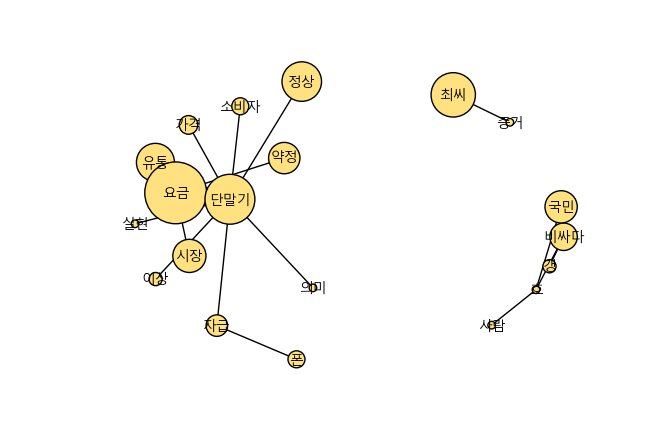

In [247]:

import sys

nodes = nx.nodes(T)
degrees = nx.degree(T)

node_size = []

for node in nodes:
    ns = degrees[node]*30
    
    node_size.append(ns)
    
if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    fornt_name = "AppleGothic"
    
    
# plt.figure(figsize=(40,30))    
nx.draw(T_word,
       pos=nx.fruchterman_reingold_layout(G_word, k=0.5),
       node_size=node_size,
       node_color="#FFE27F",
       font_family=font_name,
       label_pos=0.5, #0=head, 0.5=center, 1=tail
        with_labels=True,
        font_size=10 )
plt.savefig("휴대폰댓글graph_중요단어20_30.png")
plt.axis("off")

plt.show()